In [12]:
import warnings
warnings.filterwarnings("ignore")

#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries to set up DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score


In [2]:
#Read the flights
df = pd.read_csv('data/EDA_for_models.csv')
df.head()

,distance,arr_delay,crs_dep_time_convert,crs_arr_time_convert,duration,average_speed,avg_dep_delay_by_carrier,avgfuel_percustomer_perdistance,yearly_arrivals_per_ap,yearly_arriving_passengers_per_ap,...,month_10,month_11,month_12,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,-1.121064,-0.082922,1.199988,1.059334,-0.970006,-2.346811,0.751258,0.666065,0.728606,0.432927,...,0,0,0,1,0,0,0,0,0,0
1,-0.827246,-0.082922,0.531634,0.441222,-0.909598,-0.844355,0.751258,0.666065,-0.785920,-0.705407,...,0,0,0,0,0,0,0,0,1,0
2,-0.402228,-0.082922,0.363706,0.428543,-0.214905,-0.448253,0.751258,0.666065,-1.117036,-1.129657,...,0,0,0,0,1,0,0,0,0,0
3,-0.513102,-0.082922,-0.794999,-0.795002,-0.834088,0.542002,-0.355855,-1.109920,-0.512376,-0.378314,...,0,0,0,0,0,1,0,0,0,0
4,-0.461361,-0.082922,-0.778206,-0.684059,-0.381027,-0.359471,0.667968,0.913843,-1.104272,-1.131256,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# Create features (X) and labels (y)
y = df['cancelled_flights']
X = df.drop(['cancelled_flights','arr_delay','flight_delay','average_speed'], axis=1)

In [4]:
# Perform the split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### DecisionTreeClassifier

In [5]:
# Build a regular tree as baseline
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [6]:
tree_clf.feature_importances_

array([0.20453242, 0.        , 0.00458829, 0.        , 0.41889883,
       0.12108447, 0.00873669, 0.0755328 , 0.0126214 , 0.00762758,
       0.03226325, 0.        , 0.        , 0.06126611, 0.        ,
       0.        , 0.        , 0.00548234, 0.        , 0.        ,
       0.        , 0.01781264, 0.02062439, 0.        , 0.0051947 ,
       0.        , 0.        , 0.00267899, 0.0010551 , 0.        ,
       0.        ])

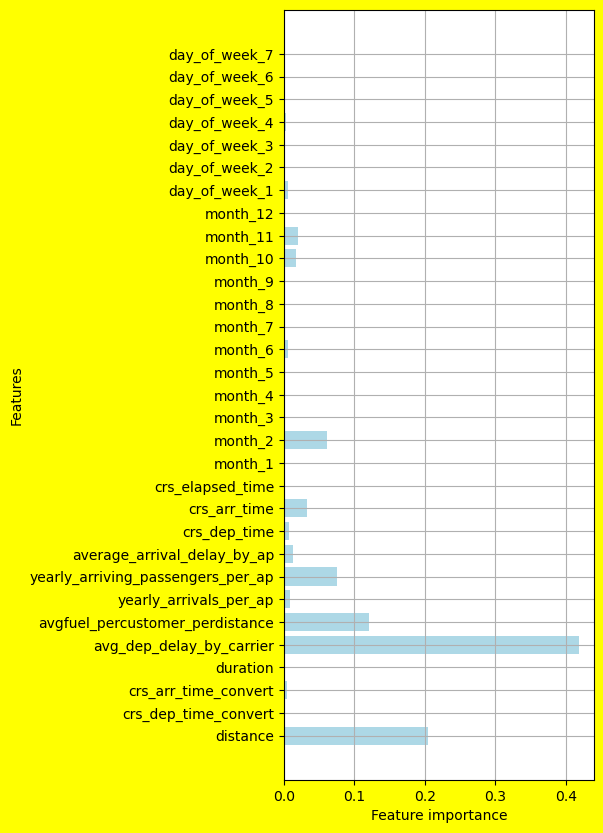

In [8]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(4, 10))
    plt.barh(range(n_features), model.feature_importances_, color='lightblue', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.rcParams["figure.facecolor"] = "yellow"
    plt.grid(True)
plot_feature_importances(tree_clf)

In [16]:
print(f'Train Accuracy - : {tree_clf.score(X_train,y_train):.3f}')
print(f'Test Accuracy - : {tree_clf.score(X_test,y_test):.3f}')

Train Accuracy - : 0.623
Test Accuracy - : 0.618


In [9]:
# Test set predictions
y_pred = tree_clf.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69     10113
           1       0.60      0.43      0.50      8075

    accuracy                           0.62     18188
   macro avg       0.61      0.60      0.60     18188
weighted avg       0.61      0.62      0.61     18188



In [13]:
# Print the Confusion Matrix and slice it into four pieces
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f'Accuracy: {acc}')
print('Confusion matrix\n\n', cm)

Accuracy: 0.6176050142951397
Confusion matrix

 [[7747 2366]
 [4589 3486]]


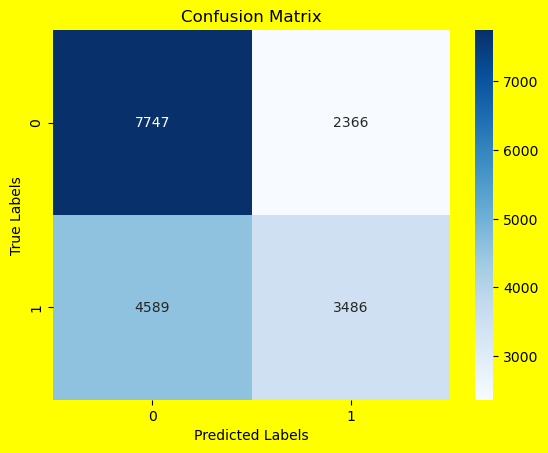

In [14]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()